# Open cv2 image processing tutorial

In [ ]:
#pip install opencv-python

In [1]:
import cv2
from matplotlib import pyplot as plt


In [2]:
image1 = cv2.imread("RGBY.jpeg", 1) #read color image for 1

In [3]:
print(image1.shape) #has 3 channel BGR channel, cv2 read image in this format, changes the original image from RGB when viewing

(183, 275, 3)


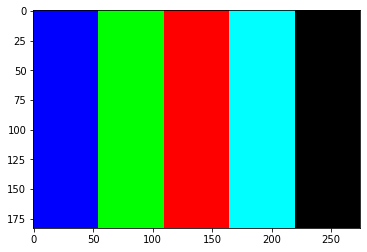

In [4]:
plt.imshow(image1)

In [5]:
image2 = cv2.imread("RGBY.jpeg", 0) 
#reading the image as greyscale when 0, when value 2 native image withouth making changes including alpha chnanel

In [6]:
print(image2.shape)

(183, 275)


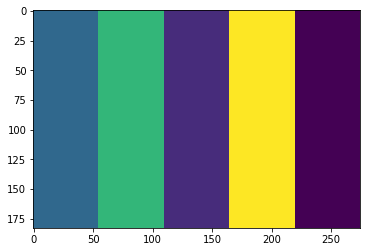

In [7]:
plt.imshow(image2)

In [8]:
#Read pixel value in cv2

print("Color Top Left: ", image1[0,0]) #when comparing with orginal image it has 255 as last index, cv2 read as BGR

Color Top Left:  [  0   0 255]


In [9]:
#color image so has 3 channel, if grayscale will have only once value
#in cv2 it opens with BGR. 
print("Color first  channel: ", image1[0,0])
print("Color second channel: ", image1[0,55]) 
print("Color third channel: ", image1[0,120])
print("Color fourth channel: ", image1[0,175])
print("Color fiveth channel: ", image1[0,230]) 

print("Greyscale first  channel: ", image2[0,0])

Color first  channel:  [  0   0 255]
Color second channel:  [  0 255   0]
Color third channel:  [255   0   0]
Color fourth channel:  [  0 255 255]
Color fiveth channel:  [0 0 0]
Greyscale first  channel:  76


In [21]:
#Split the channel 
# view using cv2, will open in diffent window
#Slicing with array

blue = image1[:, :, 0] # we want all the pixels from image and only blue channel. Since cv2 is BGR first value is 0 
green = image1[:, :, 1] #will give only the green channel
red = image1[:, :, 2] # will give only the red channel in the image

#cv2.startWindowThread()

cv2.imshow("blue pixels", blue) #it uses default photo viewer. 
cv2.imshow("green pixels", green)
cv2.imshow("red pixels", red)

cv2.waitKey(1000) & 0xFF 
#after imshow is does, cv2 looks for how long is the image open. 0 defines requires user to close. 
#in docmentation says to use mask key if using 64 bit machine
cv2.destroyAllWindows() #closes all cv2 images
cv2.waitKey(1) # using four time waitKey helps in ending the display if found error
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

In [15]:
cv2.destroyAllWindows()

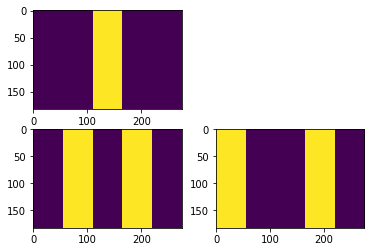

In [32]:
#another way to split the color from image

blue, green, red = cv2.split(image1)

plt.subplot(2,2,1) #this to define number or rows, no of columns and number of images
plt.imshow(blue) 
plt.subplot(2,2,3) #this to define number or rows, no of columns and number of images
plt.imshow(green) 
plt.subplot(2,2,4) #this to define number or rows, no of columns and number of images
plt.imshow(red) 

In [51]:
#Merging the image with different channels together to one image.

image_merged1 = cv2.merge((blue, green, image2)) #image2 is greyscale merging is possible.
image_merged2 = cv2.merge((blue, green, red))
#image_merged = cv2.merge((blue, green, image1)) #will give error of outbound as channel becomes 5
image_merged3 = cv2.merge((image2, image2, image2))

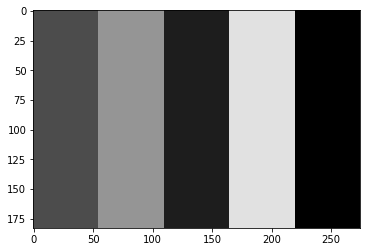

In [52]:
plt.imshow(image_merged3) #you have to take care of shape, image will have to have 3 channels

In [53]:
image_merged2.shape # image3 is not a greyscale image but merged images for 3 grayscale images

(183, 275, 3)

In [15]:
#Resize image:
#ftwo ways we can resize/zoom, we can give actual dimension or give scaling factor, here we scaling it with 2, twice.
#interpolation when we expand the image, how we fill image inbetween. different algo to do so, INTERAREA is to shrink, INTERLINEAR or INTERCUBIC to zoom
#

img = cv2.imread("shankar.jpeg",1)

resize_image = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)


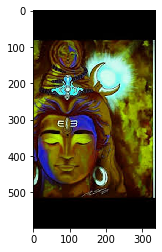

In [16]:
plt.imshow(resize_image)

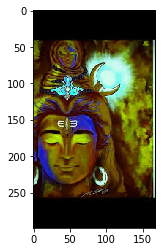

In [17]:
plt.imshow(img)

In [68]:
#Save the image

cv2.imwrite("shankar_resized.jpeg", resize_image) 

True

In [19]:
#we will try using condition to save the resized file 
cv2.imshow("resized_shankar2.jpeg",resize_image)

k = cv2.waitKey(0)

if k ==27: #if the button on keyboard is is escape key then 
    cv2.destroyAllWindows()
    cv2.waitKey(1) # making sure the windows gets closed.
    cv2.waitKey(1)
    cv2.waitKey(1)
    cv2.waitKey(1)
elif k == ord('s'): #ord is builtin fuction what key to press
    cv2.imwrite("resized_shankar2.jpeg", resize_image)


# Denoising and Edge Detection

Manupulating the image, we averaging or gaussian filter to blur. we take a kernel of 3x3 or 5x5 we convolve with throughout the image.

If we import pre defined kernel, we can define our own using cv2.kernel2d

In [69]:
import numpy as np

In [27]:
image0 = cv2.imread("noise_image.jpeg", 1) #read as greylevel image

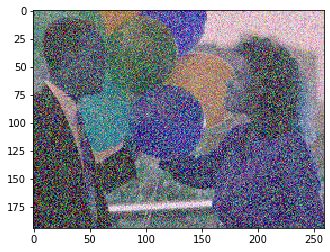

In [28]:
plt.imshow(image0)

In [101]:
#defineing the kernel.
#we using all ones 5x5 matrix kernel.  #we using np.float32 not integer we going math to it. also dividing by 25 
#to normalize(not to change the energy of image)

kernel = np.ones((5,5), np.float32)/25  #normalizing if we use 3x3 we divide by 9

In [102]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

In [103]:
#process this kernel on image

filt_2D = cv2.filter2D(image0, -1, kernel) #using convolution

In [106]:
#plt.imshow("2D_custom_filter", filt_2D)

cv2.imshow("custom_filter", filt_2D)
cv2.waitKey(1000)
cv2.destroyAllWindows()

In [107]:
#another filter blur
#define the image and filter size. blur filter is similar to filter2D, if kept the kernel size same no difference

blur = cv2.blur(image0, (5,5)) 

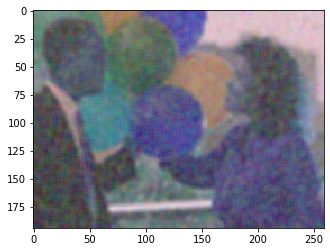

In [108]:
plt.imshow(blur)

In [109]:
#Gaussian blur, is bell curve. adding all number will be 1. ---> is also know to use Linear convolution

gaussian_blur = cv2.GaussianBlur(image0, (5,5), 0) # how much we want to blur with here 5x5

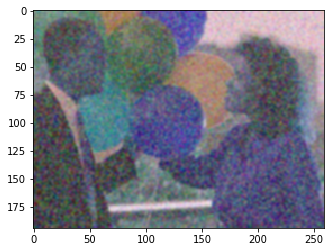

In [110]:
plt.imshow(gaussian_blur)

In [111]:
#Filter with Non Linear Process, they tend to retain edges. they are Median and Bilateral

median_filter = cv2.medianBlur(image0, 3) #dont have do 3x3. this will retain edges

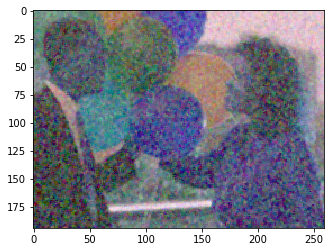

In [112]:
plt.imshow(median_filter)

In [113]:
bilateral_blur = cv2.bilateralFilter(image0, 5, 75, 75) #filter size 5

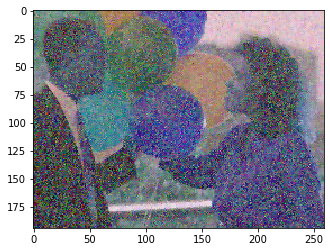

In [114]:
#this does better in retaining edges, edges are sharper, also check non-local mean filter which also does better 
#job for retainig image

plt.imshow(bilateral_blur) 

# Edge Detection

In [25]:
image5 = cv2.imread("hand.jpeg", -1)


TypeError: Image data of dtype <U6 cannot be converted to float

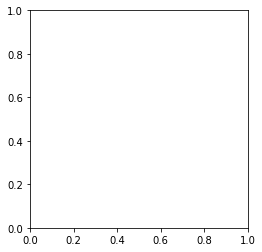

In [26]:
plt.imshow("image5",image5)

In [143]:
edges = cv2.Canny(image1, 100,200)

In [144]:
cv2.imshow("Edges_search", edges)
cv2.waitKey(1000)
cv2.destroyAllWindows()

TypeError: Image data of dtype object cannot be converted to float

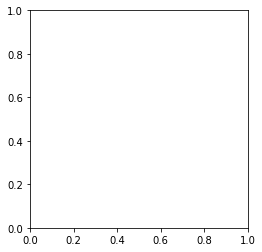

In [140]:
plt.imshow(edges)